<a href="http://isa.uniovi.es/GSDPI"><img width=70% src="http://isa.uniovi.es//~idiaz/logos/header_gsdpi_somuniovi.png" alt=""></a>

____________________

# Gaussian Clusters Example

1. Import libraries
2. Input dataset
3. Create and  initialize a SOM model
4. Train the SOM model
5. SOM component planes
6. SOM distance matrix

### 1. Import libraries

In [1]:
import somuniovi as som
import numpy as np
import matplotlib.pyplot as plt

### 2. Input dataset
Let's create a 6D input dataset by concatenating three gaussian clusters, with different variabilities, and centered at different 6D locations.

In [2]:
# Create the 6D input dataset adding up three clusters
p = np.concatenate([
    np.random.randn(6,1000)-3, 
    np.random.randn(6,1000)+3, 
    np.random.randn(6,500) + np.array([[5,-5,3,-6,-1,0]]).T],axis=1)
print("Data shape:",p.shape)

# Create labels for later visualization
p_labels = ['class 1']*1000 + ['class 2']*1000 + ['class 3']*500

Data shape: (6, 2500)


### 3. Create and  initialize a SOM model

In [3]:
# Create a SOM model
a = som.SOM(p,dims=(50,50),labels=['var 1','var 2','var 3','var 4','var 5','var 6'])

# Do PCA (linear) initialization
# This generates a 2D hyperplane in a 6D space that fits the data linearly
a.pca_init(p)

#### Component planes after initialization

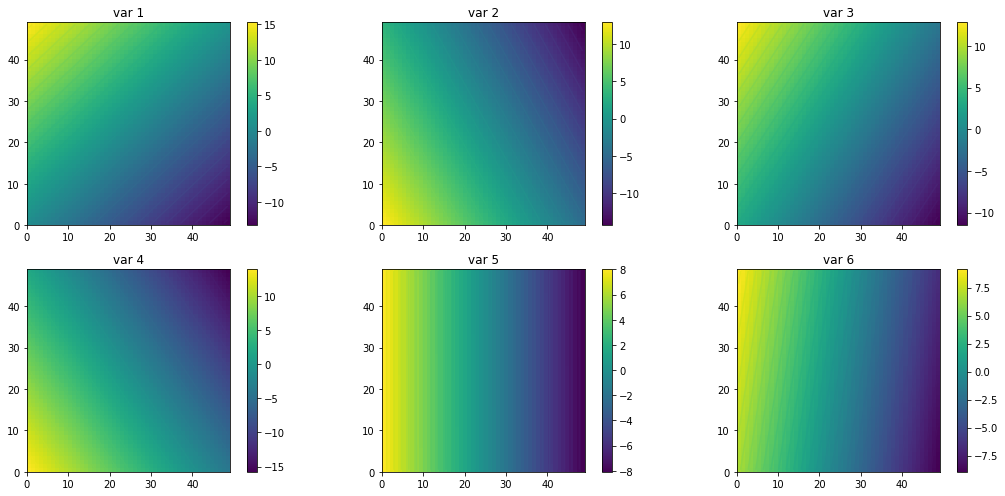

In [4]:
# Plot the planes with the PCA linear initialization
plt.figure(figsize=(15,7))
a.planes()
plt.show()

### 4. Train the SOM model
The parameter N_final stands for final neighborhood, allows to control the smoothness of the SOM. Large values produce smoother SOM models (smoother SOM's are nicer, but have less accuracy in data description).

In [5]:
# Training of the model
a.train(p,N_initial=2,N_final=1,epochs=10,verbose=True)

Epoch: 0 	 Neigh 2.000000 	 MSE = 4.135037
Epoch: 1 	 Neigh 1.888889 	 MSE = 3.797619
Epoch: 2 	 Neigh 1.777778 	 MSE = 2.514862
Epoch: 3 	 Neigh 1.666667 	 MSE = 1.624045
Epoch: 4 	 Neigh 1.555556 	 MSE = 1.358762
Epoch: 5 	 Neigh 1.444444 	 MSE = 1.226634
Epoch: 6 	 Neigh 1.333333 	 MSE = 1.145086
Epoch: 7 	 Neigh 1.222222 	 MSE = 1.076612
Epoch: 8 	 Neigh 1.111111 	 MSE = 1.015854
Epoch: 9 	 Neigh 1.000000 	 MSE = 0.955886


### 5. SOM component planes

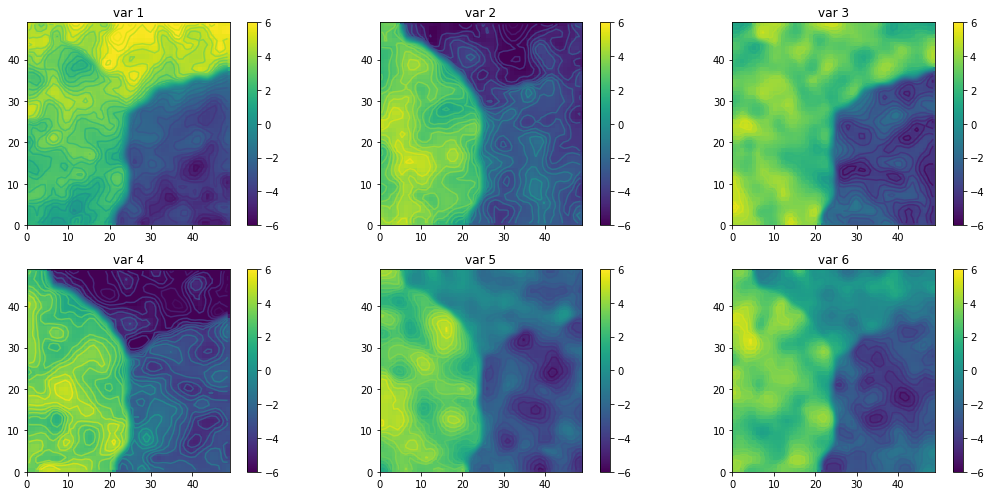

In [6]:
# Let's plot the component planes after training
plt.figure(figsize=(15,7))
ax = a.planes(vmin=-6,vmax=6)

#### Cartograph the map: add labels and symbols to the planes

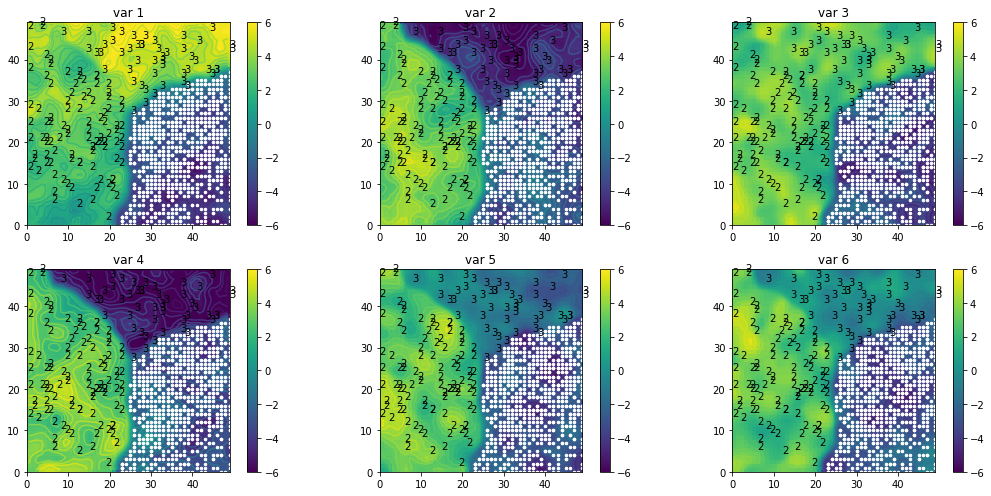

In [7]:
plt.figure(figsize=(15,7))
ax = a.planes(vmin=-6,vmax=6)

idx = np.where(np.array(p_labels)=='class 1')[0]
pr = a.fproj(p[:,idx])[0]

for i in ax:
    plt.sca(i)
    plt.plot(pr[0,:],pr[1,:],'.',markersize=5,color='white')

idx = np.where(np.array(p_labels)=='class 2')[0]
pr = a.fproj(p[:,idx])[0]

for i in ax:
    plt.sca(i)
    for j in np.arange(0,pr.shape[1],10):
        plt.text(pr[0,j],pr[1,j],'2',verticalalignment='bottom')

idx = np.where(np.array(p_labels)=='class 3')[0]
pr = a.fproj(p[:,idx])[0]

for i in ax:
    plt.sca(i)
    for j in np.arange(0,pr.shape[1],10):
        plt.text(pr[0,j],pr[1,j],'3',verticalalignment='top')


### 6. SOM distance matrix
The SOM distance matrix contains the average distance of every neuron to its closest neighbours. This is a way that allows us to visualize how much "stretched" is the SOM in the neighborhood of every point. The SOM is more stretched in regions with low input data densities and becomes more dense in areas of high input data density.

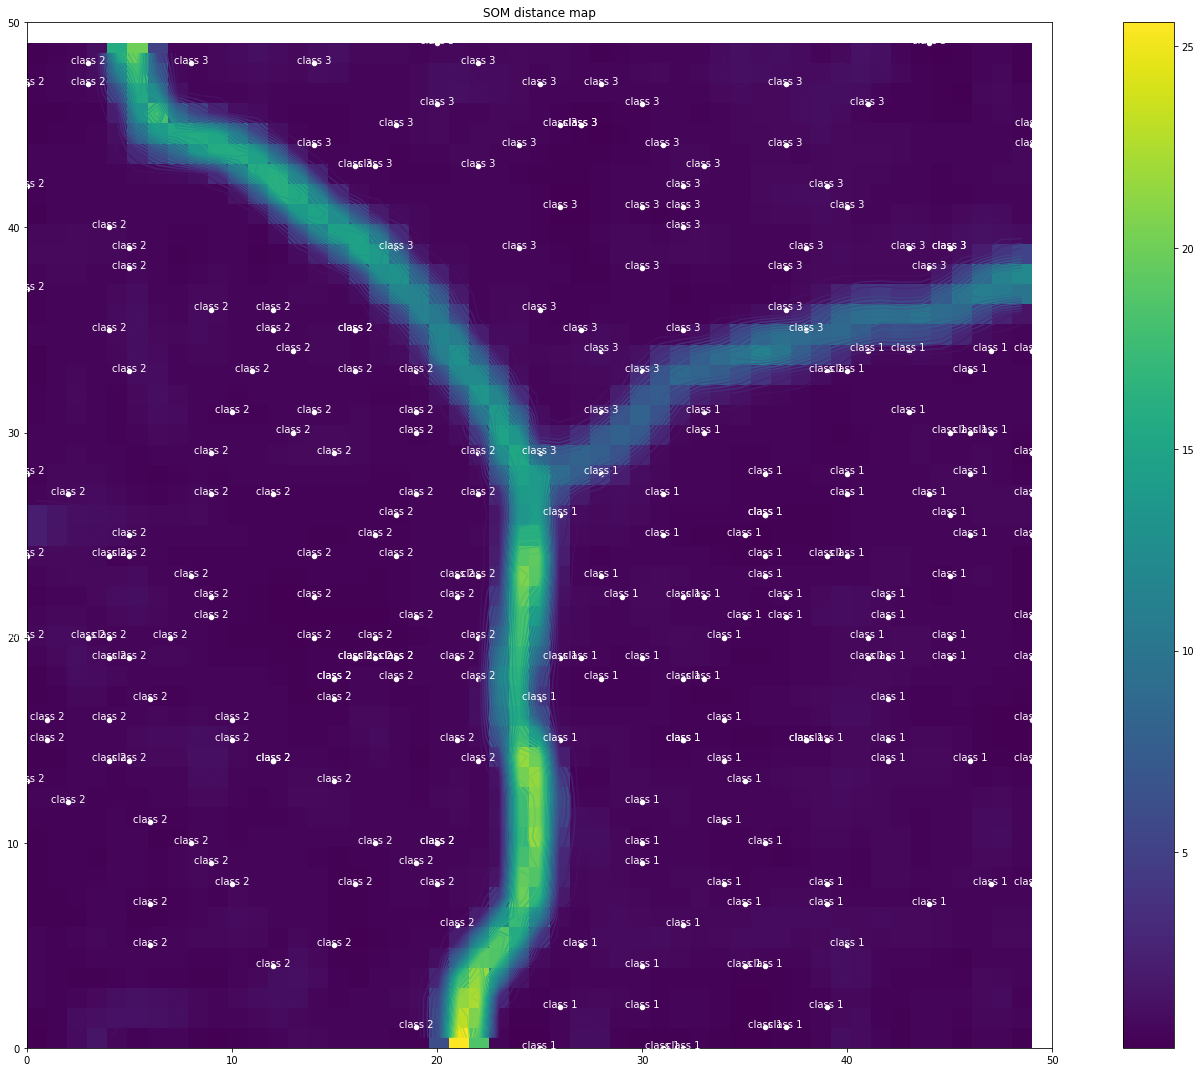

In [8]:
# Compute a component plane with interneuron distances
d = a.somdist()

# Visualize the plane
fig = plt.figure(figsize=(20,15))
som.planes(d,a.gi,a.dims,labels=['SOM distance map'])

# Compute the projections of a subset of the data and plot them on the plane
# (we'll plot only 1 each 10, for not overloading the plot)
idx = np.arange(0,2500,10)
pr = a.fproj(p[:,idx])[0]
plt.scatter(pr[0,:],pr[1,:],s=20,color='white')
for i,v in enumerate(idx):
    plt.text(pr[0,i],pr[1,i],p_labels[v],color='w',horizontalalignment='center')
plt.axis([0,a.dims[0],0,a.dims[1]])
plt.tight_layout()